<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%205/Dataset_IT_Salary_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Nama    : Daffa Fathir Fajri
# Kelas   : TK-45-04
# NIM     : 1103213149
# Lecture : 5
# Model   : EDA
# Dataset : IT_Salary

In [ ]:
ChatGPT prompt : https://chat.openai.com/share/891e27b8-f828-4d20-91b2-f62b168e0bd5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informasi Ringkas tentang DataFrame:
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                               

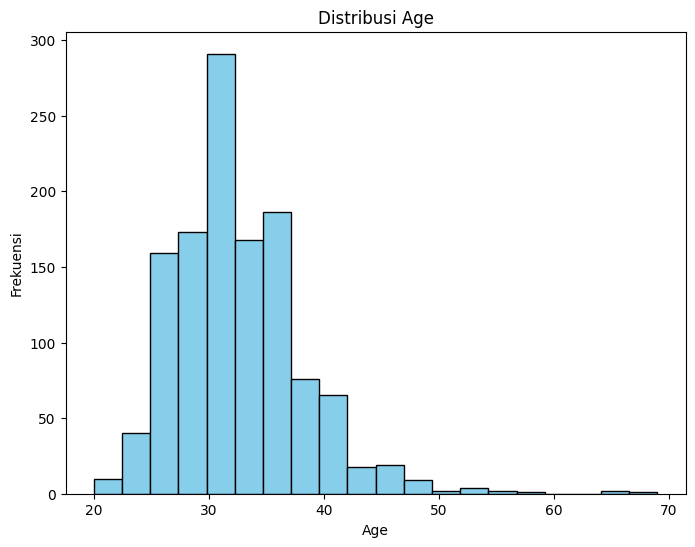

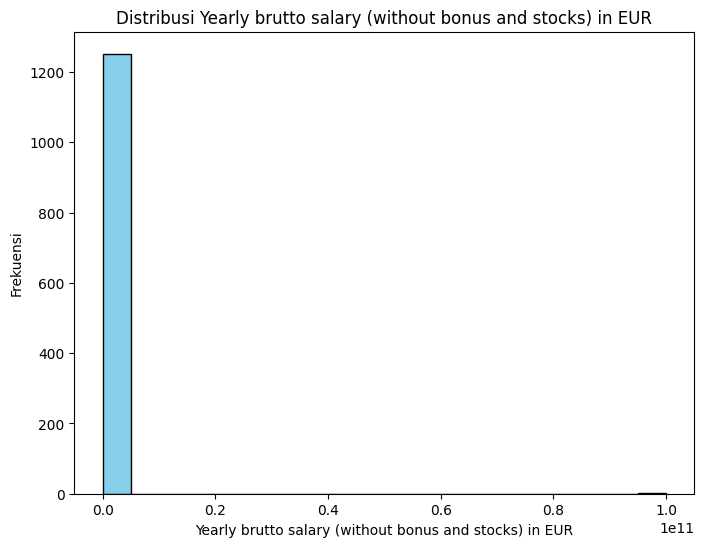

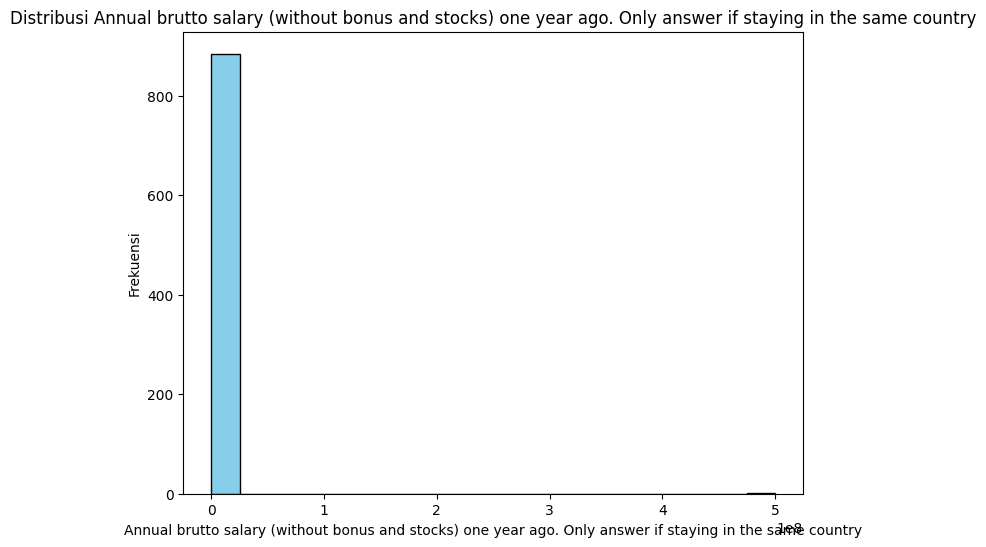

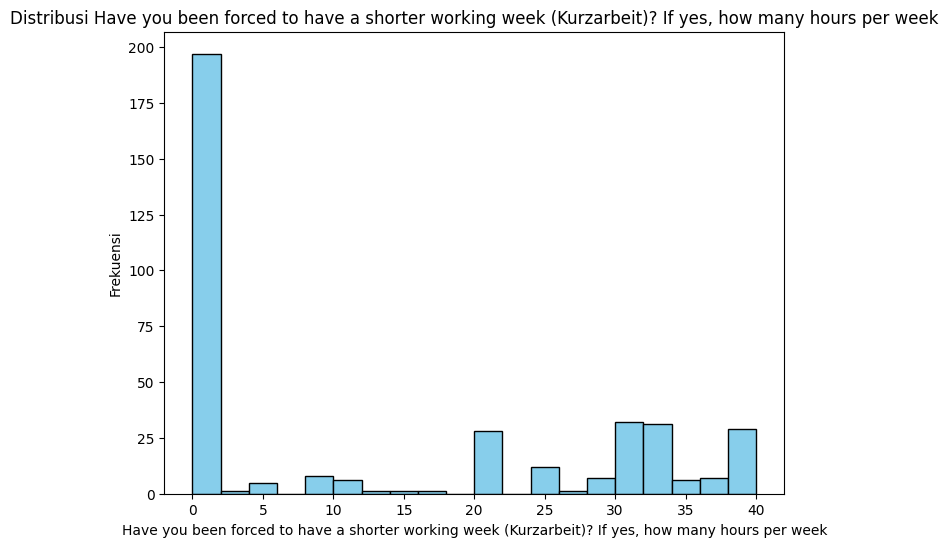

<ipython-input-12-4fbbfd3a4292>:63: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


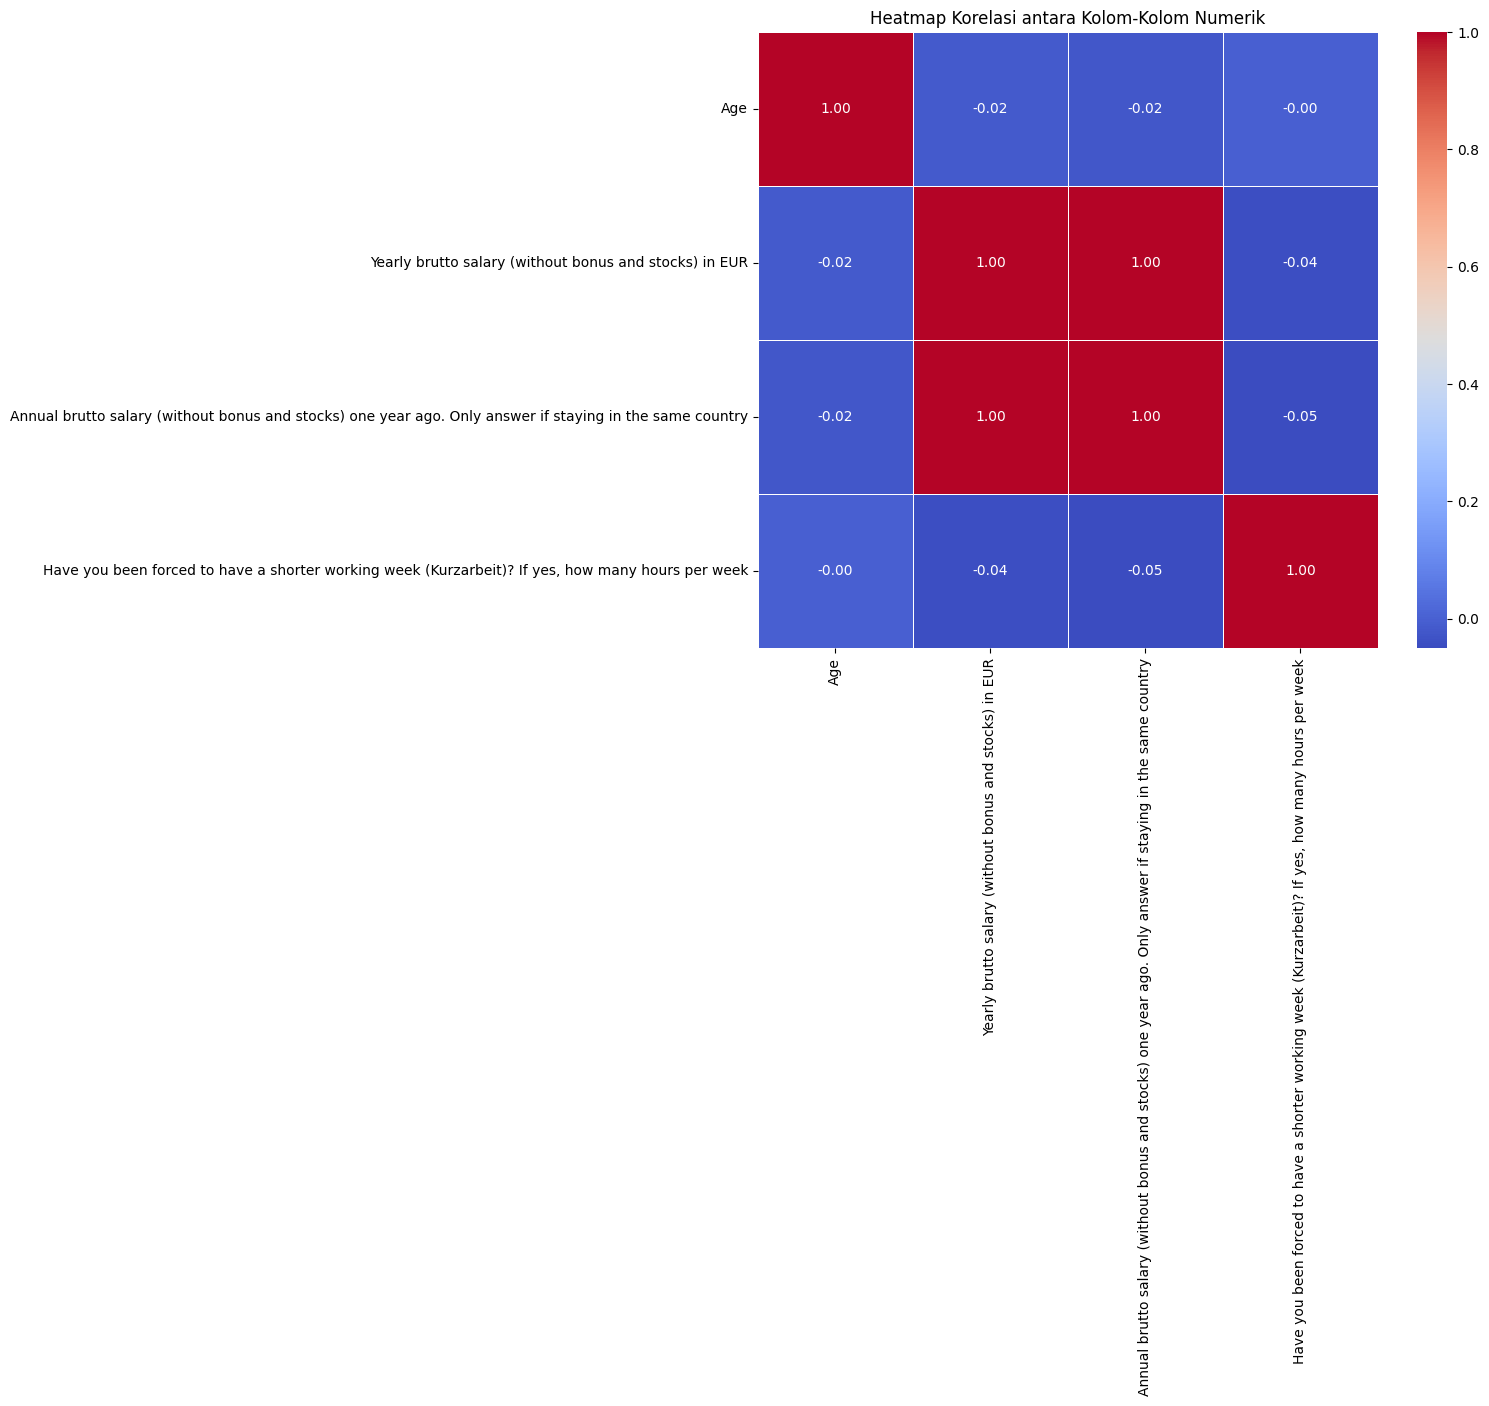

KeyError: 'JobTitle'

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Membaca file CSV dari Google Drive
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/IT Salary Survey EU  2020.csv')

# Menampilkan beberapa baris pertama dari dataset
df.head()

# Menampilkan beberapa baris ketujuh dari dataset
df.head(7)

# Menampilkan beberapa baris bawah dari dataset
df.tail(9)

# Menampilkan informasi ringkas tentang DataFrame
print("Informasi Ringkas tentang DataFrame:")
print("------------------------------------")
print(df.info())

# Menampilkan jenis data dari setiap kolom
print("Jenis Data dari Setiap Kolom:")
print("-----------------------------")
print(df.dtypes)

# Menampilkan tipe data dari setiap kolom
print("Tipe Data dari Setiap Kolom:")
print("-----------------------------")
print(df.dtypes)

# Memeriksa data yang hilang dalam DataFrame
missing_data = df.isnull().sum()

# Menampilkan jumlah data yang hilang di setiap kolom
print("Data yang Hilang dalam DataFrame:")
print("---------------------------------")
print(missing_data)

# Menghitung statistik deskriptif untuk kolom-kolom numerik
numeric_stats = df.describe()

# Menampilkan statistik deskriptif
print("Statistik Deskriptif untuk Kolom-Kolom Numerik:")
print("----------------------------------------------")
print(numeric_stats)

# Memvisualisasikan data untuk setiap kolom
import matplotlib.pyplot as plt
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Memeriksa apakah kolom merupakan numerik
        plt.figure(figsize=(8, 6))
        df[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribusi {column}')
        plt.xlabel(column)
        plt.ylabel('Frekuensi')
        plt.grid(False)
        plt.show()

# Menghitung korelasi antara kolom-kolom numerik
import seaborn as sns
correlation_matrix = df.corr()

# Memvisualisasikan korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antara Kolom-Kolom Numerik')
plt.show()

# Segmentasi data berdasarkan kolom tertentu, misalnya 'JobTitle'
segmented_data = df.groupby('JobTitle')

# Menampilkan jumlah entri dalam setiap segment
for title, group in segmented_data:
    print(f"Jumlah entri untuk {title}: {len(group)}")

# Fungsi untuk mengidentifikasi outlier dalam kolom numerik menggunakan metode IQR
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Memilih kolom-kolom numerik untuk analisis outlier
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Mengidentifikasi outlier untuk setiap kolom numerik
outliers_dict = {}
for col in numeric_columns:
    outliers_dict[col] = identify_outliers_iqr(df[col])

# Menampilkan hasil identifikasi outlier
print("Outliers Identified:")
print("--------------------")
for col, outliers in outliers_dict.items():
    print(f"Kolom '{col}': {outliers.sum()} outliers")

# Mengubah kolom waktu menjadi tipe data datetime jika belum
df['Date'] = pd.to_datetime(df['Date'])

# Mengatur kolom waktu sebagai indeks DataFrame
df.set_index('Date', inplace=True)

# Melakukan visualisasi data time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], color='blue')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Menghitung statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe())

# Melakukan peramalan sederhana (contoh)
# Misalnya, jika kita ingin meramalkan nilai 5 hari ke depan
forecast_days = 5
forecast = df['Value'].rolling(window=7).mean().shift(-forecast_days)

# Menampilkan hasil peramalan
print(f"\nPeramalan {forecast_days} hari ke depan:")
print(forecast.tail(forecast_days))

# Memisahkan data menjadi dua kelompok berdasarkan kondisi yang ingin diuji
group1 = df[df['Condition'] == 'Group1']['Score']
group2 = df[df['Condition'] == 'Group2']['Score']

# Melakukan uji t-test independen untuk membandingkan rata-rata antara dua kelompok
t_statistic, p_value = ttest_ind(group1, group2)

# Menampilkan hasil uji hipotesis
print("Hasil Uji Hipotesis:")
print("---------------------")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Menafsirkan hasil uji hipotesis
alpha = 0.05
if p_value < alpha:
    print("Kami menolak hipotesis nol. Ada bukti yang cukup untuk mendukung klaim bahwa rata-rata kedua kelompok tidak sama.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tidak ada cukup bukti untuk mendukung klaim bahwa rata-rata kedua kelompok berbeda.")